Want to build the vectors and get the hypotheses at each timestep so they can be properly scores

In [1]:
import pandas as pd

Make dummy detections. First with no simultaneous detections

In [2]:
detections = pd.DataFrame()
detections["id"] = [0, 1, 2]
detections["time"] = [0, 1, 2]
detections["object_location"] = [0, 1, 2]

In [3]:
import matplotlib.pyplot as plt

/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


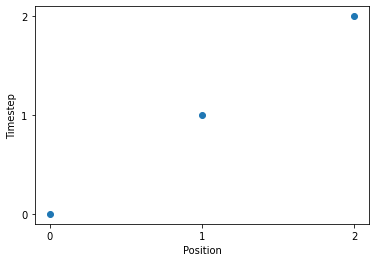

In [6]:
fig, ax = plt.subplots()

ax.scatter(detections.object_location, detections.time)

ax.set_xlabel("Position")
ax.set_ylabel("Timestep")

ax.set_xticks([0,1,2])
ax.set_yticks([0,1,2])

fig.show()

In [9]:
def make_first_branches(det_t):
    new_branches = []
    for i, row in det_t.iterrows():
        new_br = np.array([row["id"]])
        new_branches.append(new_br)
    return new_branches

In [ ]:
def make_new_branches(branches, det_t, it):

    new_branches = []
    old_it = len(branches[0])

    nan_append = np.empty(it - old_it) + np.NaN

    bz = []
    for br in branches:
        bz.append(np.append(br, nan_append))

    branches = bz
    # new_branches = []
    if len(det_t) == 1:
        # create new vector (case where this detection is a new individual)
        d = det_t.iloc[0]
        new_br = np.empty(it + 1)
        new_br[:] = np.NaN
        new_br[it] = d["id"]
        new_branches.append(new_br)

        for i, br in enumerate(branches):
            # case where this is a repeat of the last observed
            new_br_repeat = np.append(br, d["id"])
            new_branches.append(new_br_repeat)

            # get the id of the previous detection in the current branch
            last_detection = np.array(br)[np.logical_not(np.isnan(br))][-1]

            # case where it's not
            new_br_no_repeat = np.append(br, np.NaN)

    else:
        for i, br in enumerate(branches):

            for i, d in det_t.iterrows():
                # create new vector (case where this detection is a new individual)
                new_br = np.empty(it + 1)
                new_br[:] = np.NaN
                new_br[it] = d["id"]

                new_branches.append(new_br)

                new_score = 1
                new_scores.append(new_score)


                new_br_repeat = np.append(br, d["id"])
                new_branches.append(new_br_repeat)

                # get the id of the previous detection in the current branch
                last_detection = np.array(br)[np.logical_not(np.isnan(br))][-1]
                scr = probz[int(last_detection), int(d["id"])]
                new_scores.append(scores[i] + scr)

            new_br_no_repeat = np.append(br, np.NaN)
            new_branches.append(new_br_no_repeat)
            new_scores.append(scores[i] + (1 - scr))
    return new_branches, new_scores
